In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import audio access libraries
import librosa
import librosa.display
import IPython.display as ipd
import os
import warnings

warnings.filterwarnings('ignore')

In [2]:
speech_path="Audio_Speech_Actors_01-24"
song_path="Audio_Song_Actors_01-24"

In [3]:
speech_ls = os.listdir("Audio_Speech_Actors_01-24")
speech_ls

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

In [4]:
song_ls=os.listdir("Audio_Song_Actors_01-24")
song_ls

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

In [5]:
import os

file_emotion = []
file_path = []

# safer listing of actor folders
speech_ls = [d for d in os.listdir(speech_path) if os.path.isdir(os.path.join(speech_path, d))]

emotion_labels = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

for actor_folder in speech_ls:
    actor_files = os.listdir(os.path.join(speech_path, actor_folder))
    for f in actor_files:
        part = f.split('.')[0].split('-')
        emotion = part[2]  # this is string like "01", "02", etc.
        file_emotion.append(emotion_labels[emotion])
        file_path.append(os.path.join(speech_path, actor_folder, f))


In [6]:
emotions = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
paths = pd.DataFrame(file_path, columns=['Path'])
speech_df = pd.concat([paths, emotions], axis=1)
# changing integers to actual emotions.
speech_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'},
                            inplace=True)

speech_df.head()

,Path,Emotions
0,Audio_Speech_Actors_01-24\Actor_01\03-01-01-01...,neutral
1,Audio_Speech_Actors_01-24\Actor_01\03-01-01-01...,neutral
2,Audio_Speech_Actors_01-24\Actor_01\03-01-01-01...,neutral
3,Audio_Speech_Actors_01-24\Actor_01\03-01-01-01...,neutral
4,Audio_Speech_Actors_01-24\Actor_01\03-01-02-01...,calm


In [7]:
import os

file_emotion = []
file_path = []

# safer listing of actor folders
song_ls = [d for d in os.listdir(song_path) if os.path.isdir(os.path.join(song_path, d))]

emotion_labels = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

for actor_folder in speech_ls:
    actor_files = os.listdir(os.path.join(song_path, actor_folder))
    for f in actor_files:
        part = f.split('.')[0].split('-')
        emotion = part[2]  # this is string like "01", "02", etc.
        file_emotion.append(emotion_labels[emotion])
        file_path.append(os.path.join(song_path, actor_folder, f))

In [8]:
emotions = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
paths = pd.DataFrame(file_path, columns=['Path'])
song_df = pd.concat([paths, emotions], axis=1)
# changing integers to actual emotions.
song_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear'},
                            inplace=True)

song_df.head()

,Path,Emotions
0,Audio_Song_Actors_01-24\Actor_01\03-02-01-01-0...,neutral
1,Audio_Song_Actors_01-24\Actor_01\03-02-01-01-0...,neutral
2,Audio_Song_Actors_01-24\Actor_01\03-02-01-01-0...,neutral
3,Audio_Song_Actors_01-24\Actor_01\03-02-01-01-0...,neutral
4,Audio_Song_Actors_01-24\Actor_01\03-02-02-01-0...,calm


In [9]:
concate = pd.concat([speech_df,song_df], axis = 0)
concate.to_csv("data preprocess/data_path.csv",index=False)
concate.head()
concate.tail()

,Path,Emotions
1007,Audio_Song_Actors_01-24\Actor_24\03-02-06-01-0...,fearful
1008,Audio_Song_Actors_01-24\Actor_24\03-02-06-02-0...,fearful
1009,Audio_Song_Actors_01-24\Actor_24\03-02-06-02-0...,fearful
1010,Audio_Song_Actors_01-24\Actor_24\03-02-06-02-0...,fearful
1011,Audio_Song_Actors_01-24\Actor_24\03-02-06-02-0...,fearful


In [10]:
print(concate.Emotions.value_counts())

Emotions
calm         376
happy        376
sad          376
angry        376
fearful      376
disgust      192
surprised    192
neutral      188
Name: count, dtype: int64


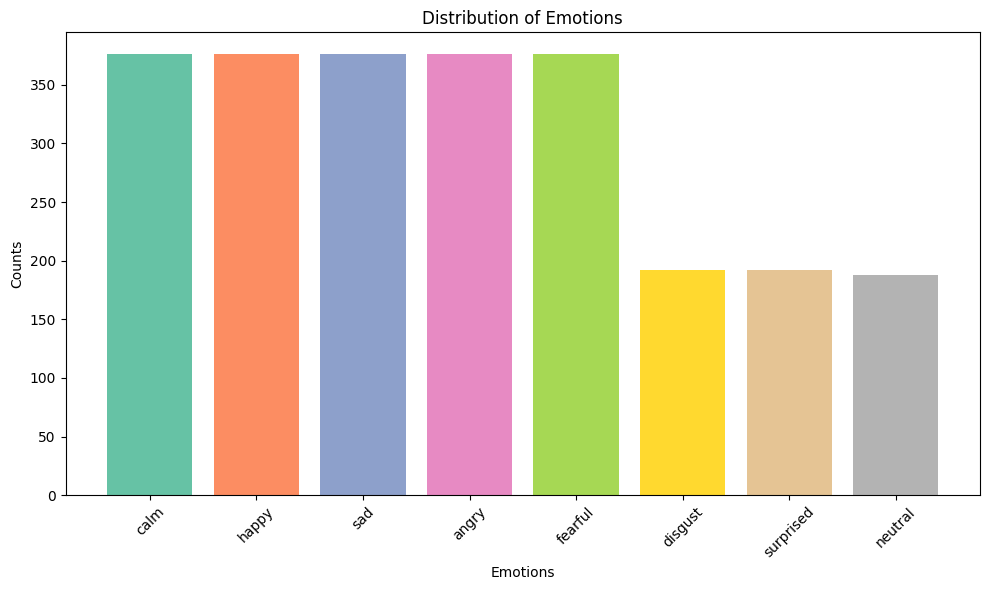

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Method 1: Using a color palette
emotion_counts = concate.Emotions.value_counts()

# Create figure and axis
plt.figure(figsize=(10, 6))

# Create bar plot with different colors using seaborn palette
colors = sns.color_palette("Set2", len(emotion_counts))  # You can try: "Set1", "Set2", "husl", "viridis", etc.
bars = plt.bar(emotion_counts.index, emotion_counts.values, color=colors)

# Add labels and title
plt.xlabel('Emotions')
plt.ylabel('Counts')
plt.title('Distribution of Emotions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
# Instead of using file_path[0], use concate['Path'].values[0]
file_path = concate['Path'].values[0]
label = concate['Emotions'].values[0]
# Then load
data, sr = librosa.load(file_path)
print(sr)
print(label)

22050
neutral


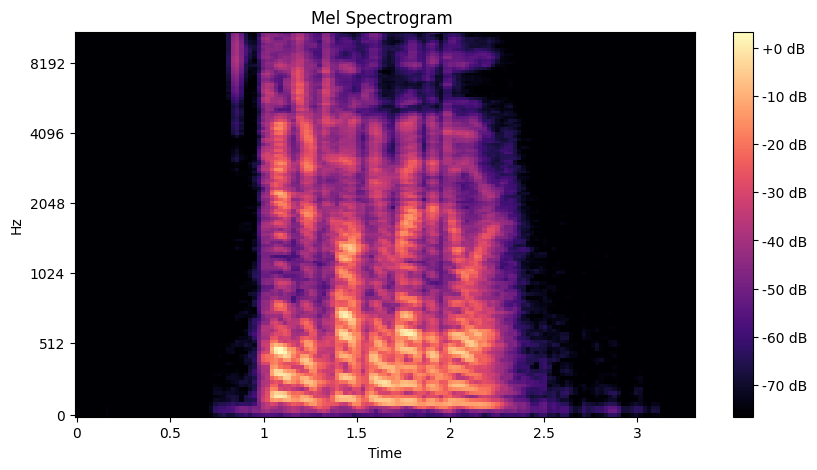

In [13]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000)
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')

create MFCC

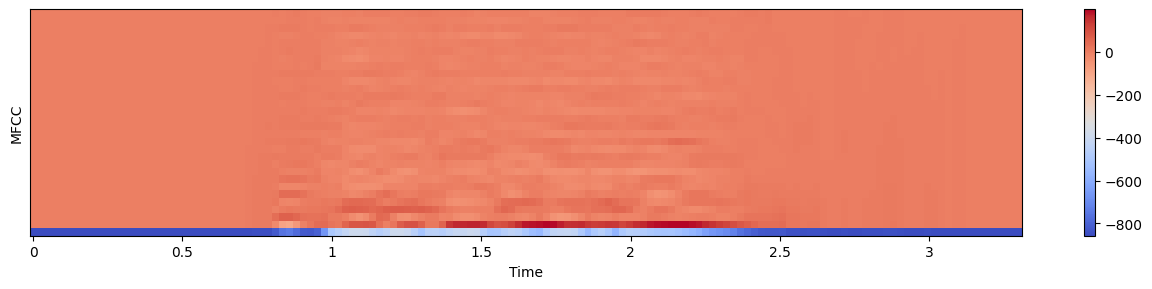

In [14]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)

# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

Augmentation

In [15]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.resample(data, orig_sr=sr, target_sr=int(sr * rate))

# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)

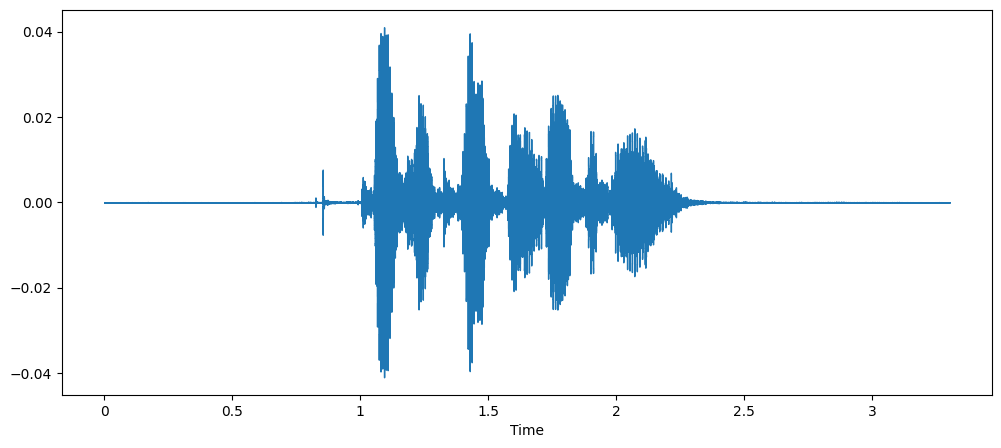

In [16]:
# NORMAL AUDIO
import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

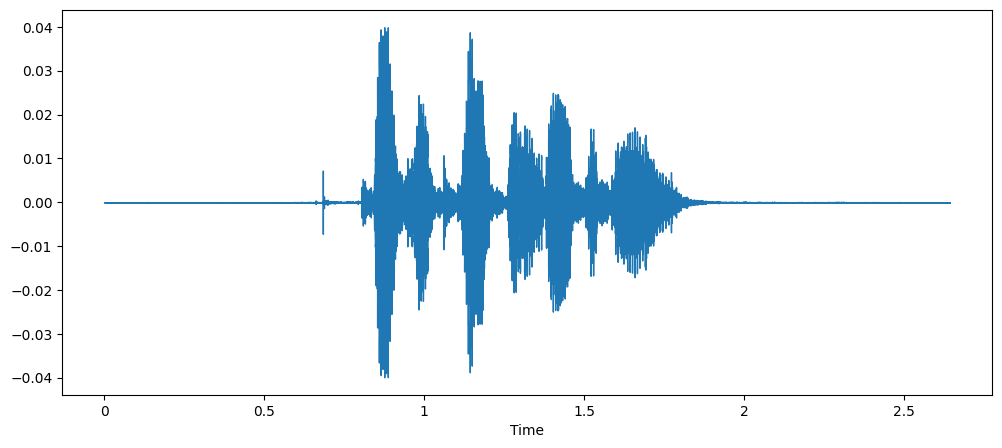

In [17]:
# AUDIO WITH NOISE
x = stretch(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

In [18]:
def zcr(data, frame_length, hop_length):
    zcr = librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)

def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)

def mfcc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mfcc = librosa.feature.mfcc(y=data, sr=sr)
    return np.squeeze(mfcc.T) if not flatten else np.ravel(mfcc.T)


def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])

    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)

    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,aud2))

    pitched_audio=pitch(data,sr)
    aud3=extract_features(pitched_audio)
    audio=np.vstack((audio,aud3))

    pitched_audio1=pitch(data,sr)
    pitched_noised_audio=noise(pitched_audio1)
    aud4=extract_features(pitched_noised_audio)
    audio=np.vstack((audio,aud4))

    return audio

In [19]:
from joblib import Parallel, delayed
import timeit
start = timeit.default_timer()
# Define a function to get features for a single audio file
def process_feature(path, emotion):
    features = get_features(path)
    X = []
    Y = []
    for ele in features:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)
    return X, Y

paths = concate.Path
emotions = concate.Emotions

# Run the loop in parallel
results = Parallel(n_jobs=-1)(delayed(process_feature)(path, emotion) for (path, emotion) in zip(paths, emotions))

# Collect the results
X = []
Y = []
for result in results:
    x, y = result
    X.extend(x)
    Y.extend(y)


stop = timeit.default_timer()

print('Time: ', stop - start)

Time:  52.63702500006184


In [20]:
print(len(X))
len(Y)

9808


9808

In [21]:
concate['Path'].shape

(2452,)

saving features 

In [22]:
features = pd.DataFrame(X)
features['Emotion'] = Y
features.to_csv('data preprocess/emotions_features.csv', index=False)
features.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotion
0,0.173828,0.264648,0.372559,0.486328,0.625488,0.681152,0.720703,0.651855,0.562988,0.559082,...,0.766315,0.755441,0.743671,0.731043,0.717561,0.703260,0.688124,0.672208,0.655518,neutral
1,0.257812,0.377930,0.497070,0.502441,0.497070,0.499023,0.502441,0.495605,0.501465,0.504395,...,-0.256832,3.805760,3.417761,1.515572,-3.097393,0.060673,2.899992,-2.098123,-2.786790,neutral
2,0.256348,0.354492,0.471191,0.414062,0.378418,0.373535,0.354492,0.408691,0.466797,0.522461,...,0.006713,0.006601,0.006483,0.006356,0.006218,0.006066,0.005919,0.005759,0.005588,neutral
3,0.253906,0.371582,0.492188,0.487305,0.492676,0.497559,0.506348,0.504883,0.493164,0.496582,...,4.437302,-0.368084,-2.041091,0.425484,-2.206257,-0.516091,-2.535405,0.723387,3.080032,neutral
4,0.247070,0.389648,0.564941,0.642578,0.665527,0.684570,0.676270,0.666992,0.648926,0.595703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral


In [23]:
emo_df = pd.read_csv('data preprocess/emotions_features.csv')
emo_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotion
0,0.173828,0.264648,0.372559,0.486328,0.625488,0.681152,0.720703,0.651855,0.562988,0.559082,...,0.766315,0.755441,0.743671,0.731043,0.717561,0.703260,0.688124,0.672208,0.655518,neutral
1,0.257812,0.377930,0.497070,0.502441,0.497070,0.499023,0.502441,0.495605,0.501465,0.504395,...,-0.256832,3.805760,3.417761,1.515572,-3.097393,0.060673,2.899992,-2.098123,-2.786790,neutral
2,0.256348,0.354492,0.471191,0.414062,0.378418,0.373535,0.354492,0.408691,0.466797,0.522461,...,0.006713,0.006601,0.006483,0.006356,0.006218,0.006066,0.005919,0.005759,0.005588,neutral
3,0.253906,0.371582,0.492188,0.487305,0.492676,0.497559,0.506348,0.504883,0.493164,0.496582,...,4.437302,-0.368084,-2.041091,0.425484,-2.206257,-0.516091,-2.535405,0.723387,3.080032,neutral
4,0.247070,0.389648,0.564941,0.642578,0.665527,0.684570,0.676270,0.666992,0.648926,0.595703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral


In [24]:
print(emo_df.isna().sum())

0           0
1           0
2           0
3           0
4           0
           ..
2372       60
2373       60
2374       60
2375       60
Emotion     0
Length: 2377, dtype: int64


In [25]:
emo_df = emo_df.fillna(0)
emo_df.isna().sum()

0          0
1          0
2          0
3          0
4          0
          ..
2372       0
2373       0
2374       0
2375       0
Emotion    0
Length: 2377, dtype: int64

In [26]:
X = emo_df.drop(columns = ['Emotion'])
Y = emo_df['Emotion']

In [27]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,2366,2367,2368,2369,2370,2371,2372,2373,2374,2375
0,0.173828,0.264648,0.372559,0.486328,0.625488,0.681152,0.720703,0.651855,0.562988,0.559082,...,0.776301,0.766315,0.755441,0.743671,0.731043,0.717561,0.703260,0.688124,0.672208,0.655518
1,0.257812,0.377930,0.497070,0.502441,0.497070,0.499023,0.502441,0.495605,0.501465,0.504395,...,-4.374638,-0.256832,3.805760,3.417761,1.515572,-3.097393,0.060673,2.899992,-2.098123,-2.786790
2,0.256348,0.354492,0.471191,0.414062,0.378418,0.373535,0.354492,0.408691,0.466797,0.522461,...,0.006816,0.006713,0.006601,0.006483,0.006356,0.006218,0.006066,0.005919,0.005759,0.005588
3,0.253906,0.371582,0.492188,0.487305,0.492676,0.497559,0.506348,0.504883,0.493164,0.496582,...,7.634356,4.437302,-0.368084,-2.041091,0.425484,-2.206257,-0.516091,-2.535405,0.723387,3.080032
4,0.247070,0.389648,0.564941,0.642578,0.665527,0.684570,0.676270,0.666992,0.648926,0.595703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
Y.head()

0    neutral
1    neutral
2    neutral
3    neutral
4    neutral
Name: Emotion, dtype: object

In [29]:
# Encodeing label
from sklearn.preprocessing import OneHotEncoder
en = OneHotEncoder()
Y = en.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [30]:
Y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
Y.shape

(9808, 8)

In [32]:
# splitting
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state = 42 , test_size = 0.2 , shuffle = True)

In [33]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7846, 2376)
(7846, 8)
(1962, 2376)
(1962, 8)


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [35]:
x_train.shape

(7846, 2376)

In [36]:
import keras
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [37]:
# callbacks
#1. early stopping
early_stopping = EarlyStopping(monitor='val_accuracy',mode='max',patience=5,restore_best_weights=True)
#2. ReduceLROnPlateau
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.5,min_lr=0.00001)
#3. ModelCheckpoint
model_checkpoint = ModelCheckpoint('best_model1_weights.keras', monitor='val_accuracy', save_best_only=True)
# prepare data for conv1d
x_train_cnn = np.expand_dims(x_train, axis=2)
x_test_cnn = np.expand_dims(x_test, axis=2)

In [38]:
import tensorflow.keras.layers as L

model = tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(x_train_cnn.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the second max pooling layer

    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fourth max pooling layer

    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fifth max pooling layer

    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(8,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 2376, 512)           │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2376, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1188, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1188, 512)           │       1,311,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1188, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 594, 512)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 594, 512)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 594, 256)            │         655,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 594, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 297, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 297, 256)            │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 297, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 149, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 149, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 149, 128)            │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 149, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 75, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 75, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9600)                │              

 Total params: 7,193,736 (27.44 MB)

 Trainable params: 7,189,384 (27.43 MB)

 Non-trainable params: 4,352 (17.00 KB)

In [39]:
history=model.fit(x_train_cnn, y_train, epochs=40, validation_data=(x_test_cnn, y_test), batch_size=64,callbacks=[early_stopping,lr_reduction,model_checkpoint])

Epoch 1/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 504s 4s/step - accuracy: 0.3626 - loss: 1.9960 - val_accuracy: 0.0744 - val_loss: 3.6609 - learning_rate: 0.0010
Epoch 2/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 498s 4s/step - accuracy: 0.5952 - loss: 1.1004 - val_accuracy: 0.1407 - val_loss: 3.4549 - learning_rate: 0.0010
Epoch 3/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 497s 4s/step - accuracy: 0.7269 - loss: 0.7756 - val_accuracy: 0.1488 - val_loss: 4.4835 - learning_rate: 0.0010
Epoch 4/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 599s 5s/step - accuracy: 0.8106 - loss: 0.5468 - val_accuracy: 0.2717 - val_loss: 3.1071 - learning_rate: 0.0010
Epoch 5/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 624s 5s/step - accuracy: 0.8804 - loss: 0.3595 - val_accuracy: 0.5907 - val_loss: 1.2584 - learning_rate: 0.0010
Epoch 6/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 531s 4s/step - accuracy: 0.9278 - loss: 0.2328 - val_accuracy: 0.7217 - val_loss: 0.8547 - learning_rate: 0.0010
Epoch 7/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 532s 4s/step - accuracy: 0.9453 - loss: 0.

In [44]:
model.save_weights("cnn_model.weights.h5")

print('model evaluation accuracy: ',model.evaluate(x_test_cnn , y_test))

62/62 ━━━━━━━━━━━━━━━━━━━━ 25s 405ms/step - accuracy: 0.9401 - loss: 0.2041
model evaluation accuracy:  [0.201176255941391, 0.9393476247787476]


In [45]:
# inference on test data:
pred = model.predict(x_test_cnn)
y_pred = en.inverse_transform(pred)
y_true = en.inverse_transform(y_test)

df_results = pd.DataFrame({
    'True Label': y_true.flatten(),
    'Predicted Label': y_pred.flatten()
})

df_results.head(15)

62/62 ━━━━━━━━━━━━━━━━━━━━ 26s 421ms/step


,True Label,Predicted Label
0,angry,angry
1,surprised,surprised
2,angry,angry
3,calm,calm
4,surprised,surprised
5,sad,sad
6,happy,happy
7,fearful,fearful
8,surprised,surprised
9,angry,angry


In [48]:
from sklearn.metrics import accuracy_score,f1_score
overall_accuracy = accuracy_score(y_true, y_pred)
print(f"\nOverall Test Accuracy: {overall_accuracy:.4f} ({overall_accuracy*100:.2f}%)")
    
# F1 Scores
f1_macro = f1_score(y_true, y_pred, average='macro')
f1_weighted = f1_score(y_true, y_pred, average='weighted')
f1_micro = f1_score(y_true, y_pred, average='micro')
    
print(f"\nF1 Scores:")
print(f"  Macro F1:    {f1_macro:.4f}")
print(f"  Weighted F1: {f1_weighted:.4f}")
print(f"  Micro F1:    {f1_micro:.4f}")


Overall Test Accuracy: 0.9393 (93.93%)

F1 Scores:
  Macro F1:    0.9386
  Weighted F1: 0.9394
  Micro F1:    0.9393


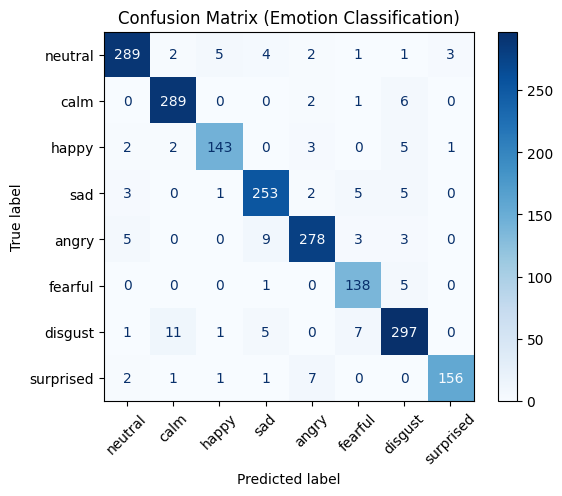

Accuracy for class 'neutral': 94.14%
Accuracy for class 'calm': 96.98%
Accuracy for class 'happy': 91.67%
Accuracy for class 'sad': 94.05%
Accuracy for class 'angry': 93.29%
Accuracy for class 'fearful': 95.83%
Accuracy for class 'disgust': 92.24%
Accuracy for class 'surprised': 92.86%


In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true, y_pred)

class_names = [
    "neutral", "calm", "happy", "sad", 
    "angry", "fearful", "disgust", "surprised"
]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix (Emotion Classification)")
plt.show()


per_class_acc = cm.diagonal() / cm.sum(axis=1)

for i, acc in enumerate(per_class_acc):
    print(f"Accuracy for class '{class_names[i]}': {acc*100:.2f}%")


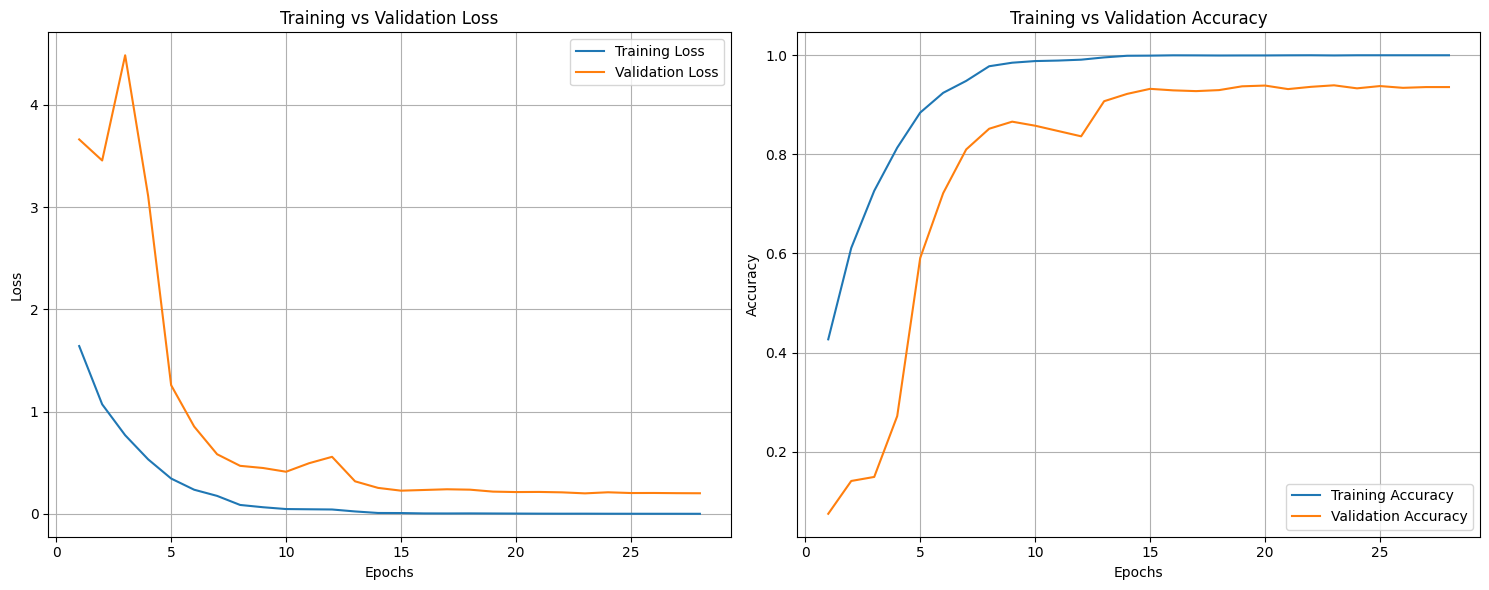

In [50]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['accuracy']) + 1)

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Loss
ax[0].plot(epochs, history.history['loss'], label='Training Loss')
ax[0].plot(epochs, history.history['val_loss'], label='Validation Loss')
ax[0].set_title('Training vs Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid(True)

# Accuracy
ax[1].plot(epochs, history.history['accuracy'], label='Training Accuracy')
ax[1].plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
ax[1].set_title('Training vs Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


In [51]:
model.save("cnn_model_full.keras")

import joblib
joblib.dump(scaler, 'emotion_scaler.pkl') #save scaler
joblib.dump(en, 'emotion_encoder.pkl')    #save encoder

['emotion_encoder.pkl']

Inference

In [52]:
from tensorflow.keras.models import load_model

model = load_model("cnn_model_full.keras")
print('Done')

Done


In [53]:
import numpy as np
import librosa
import joblib
from tensorflow import keras

# Load all required components
MODEL = keras.models.load_model("cnn_model_full.keras")
SCALER = joblib.load('emotion_scaler.pkl')
ENCODER = joblib.load('emotion_encoder.pkl')

def zcr(data, frame_length, hop_length):
    zcr_feature = librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr_feature)

def rmse(data, frame_length=2048, hop_length=512):
    rmse_feature = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse_feature)

def mfcc(data, sr, frame_length=2048, hop_length=512, flatten=True):
    mfcc_feature = librosa.feature.mfcc(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)
    return np.squeeze(mfcc_feature.T) if not flatten else np.ravel(mfcc_feature.T)


def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_predict_feat(path):
    d, s_rate = librosa.load(path, duration=2.5, offset=0.6)
    res = extract_features(d)
    
    desired_length = 2376
    current_length = len(res)
    
    if current_length > desired_length:
        # Truncate
        res = res[:desired_length]
    elif current_length < desired_length:
        # Pad with zeros
        res = np.pad(res, (0, desired_length - current_length), 'constant')
    
    result = np.reshape(res, (1, desired_length))
    i_result = SCALER.transform(result)
    final_result = np.expand_dims(i_result, axis=2)
    
    return final_result

    
    return final_result

def prediction(path1):
    res=get_predict_feat(path1)
    predictions=MODEL.predict(res)
    y_pred = ENCODER.inverse_transform(predictions)
    print(y_pred[0][0])

In [54]:
prediction("Audio_Song_Actors_01-24/Actor_11/03-02-02-01-01-02-11.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
calm
